<a href="https://colab.research.google.com/github/mgite03/bu-ai4all-2019/blob/main/ai-basics/Copy_of_Lesson_4__Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practice Problems
## Lesson 4: Classification
---
Created by Terron Ishihara

### Problem 1

After a long and tiring adventure through the wilderness, Olimar and Louie head over to their spaceship with their [Pikmin](https://en.wikipedia.org/wiki/Pikmin_(series)) companions, ready to head home. Weary from their travels and eager to depart, they signal for the ship's ramp to lower. However, due to a technical malfunction, the ramp shoot off its hinges, colliding with the two explorers, knocking them unconscious. When they wake, they have no recollection of what happened, nor can they even recognize the Pikmin they had befriended that day!

> a. Look at the picture pikmin_decision_tree.png included in the drive. Based on this grouping (the left Pikmin belonging to Olimar and the right Pikmin belonging to Louie), build a decision tree to help jog their memories of which Pikmin each of them recruited onto their team. Your decision tree should have at least 3 levels and therefore at least 3 features to separate each set of Pikmin.

Tree diagram in notebook


> b. Does your decision tree separate all Pikmin correctly into their respective two groups? If not, which Pikmin is/are misclassified?

Most of the classifications are done by color, and there is one blue Pikmin that is misclassified. (They are with Louie instead of Olimar.)

### Problem 2

Let's explore K-Nearest Neighbors using scikit-learn. For this example, we will use a data set of hand-written digits. We begin by loading the data set, which is a very low-resolution (8x8 pixels) version of the MNIST data set.

<Figure size 432x288 with 0 Axes>

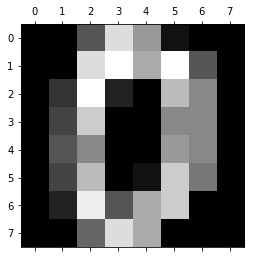

In [ ]:
import matplotlib.pyplot as plt
from sklearn import datasets, neighbors

# Load the digits data set
digits = datasets.load_digits() 

# Visualize an example digit image 
plt.gray() 
plt.matshow(digits.images[0]) # Use the first digit in the data set
plt.show()

> Each data sample is an 8x8 array of gray-scale values and will be the input values for our classifier. The target values are stored in a list of integers, each representing the digits 0-9.

In [ ]:
# Extract the input data, force values to be between 0.0 and 1.0
X_digits = digits.data / digits.data.max()

# Extract the true values for each sample (each a digit between 0-9)
y_digits = digits.target

# Print the target values
y_digits

array([0, 1, 2, ..., 8, 9, 8])

> Now that we understand the data set being used, we can split the samples into a training set and test set. Here we use a 90/10 split (90% goes to the training set, 10% goes to the test set).

In [ ]:
n_samples = len(X_digits)
# Training set will be 90% of available samples,
# testing set will be remaining 10%
train_test_split = int(.9*n_samples)

# Sidenote:
# sklearn has a method that does this partitioning for us,
# but it is useful to see how you could do this manually.

# Partition training set
X_train = X_digits[:train_test_split]
y_train = y_digits[:train_test_split]
# Partition test set
X_test = X_digits[train_test_split:]
y_test = y_digits[train_test_split:]

> All that's left is to import the K-Nearest Neighbors classifier, train the classifier on the training set, and test the resulting model on the test set. 

In [ ]:
# Import the default K-Nearest Neighbors classifier
# What does the 5 represent in the line of code below?
knn = neighbors.KNeighborsClassifier(n_neighbors=3)

# Train the classifer
knn.fit(X_train, y_train)
# Compute the score (mean accuracy) on test set
score = knn.score(X_test, y_test)
print('KNN score: %f' % score)

KNN score: 0.966667


> Recall that `k` is an input to a K-Neighbors classifier, specifying how many neighboring data point to use on each update. Where in the code do you think we provide a value for `k`? Try using other values to see how the score is affected.

